In [2]:
import pandas as pd
import statsmodels.api as sm

In [19]:
users_df = pd.read_csv('users.csv')
#repos_df = pd.read_csv('repositories1.csv')

In [73]:
# 1. Top 5 users in Tokyo with the highest number of followers
tokyo_users = users_df[users_df['location'].str.contains('Tokyo', na=False)]
top_users_five_tokyo = tokyo_users.sort_values(by='followers', ascending=False).head(5)['login'].tolist()
print("Ans 1: Top 5 users with the highest number of followers:", ", ".join(top_users_five_tokyo))

Ans 1: Top 5 users with the highest number of followers: dennybritz, wasabeef, dai-shi, rui314, domenic


In [68]:
# 2. 5 earliest registered GitHub users in Tokyo
earliest_users_five_tokyo = users_df.sort_values(by='created_at', ascending=True).head(5)['login'].tolist()
print("Ans 2: 5 earliest registered GitHub users:", ", ".join(earliest_users_five_tokyo))

Ans 2: 5 earliest registered GitHub users: kana, kakutani, mootoh, lhl, walf443


In [54]:
# 3. 3 most popular licenses among these users
repos_with_license = repos_df[repos_df['license_name'].notnull()]
top_3_licenses = repos_with_license['license_name'].value_counts().head(3).index.tolist()
print("Ans 3 : Top 3 most popular licenses:", ", ".join(top_3_licenses))

Ans 3 : Top 3 most popular licenses: mit, apache-2.0, other


In [32]:
# 4. Which company do the majority of these developers work at?
users_with_company = users_df[users_df['company'].notnull()].copy()  
users_with_company.loc[:, 'company'] = users_with_company['company'].str.strip().str.lstrip('@').str.upper()
most_common_company = users_with_company['company'].value_counts().idxmax()
print("Majority of these developers work at:", most_common_company)

Majority of these developers work at: GOOGLE


In [33]:
# 5. Which programming language is most popular among these users?
repos_with_language = repos_df[repos_df['language'].notnull()]
most_common_language = repos_with_language['language'].value_counts().idxmax()
print("Ans 5 : Most popular programming language:", most_common_language)

Ans 5 : Most popular programming language: JavaScript


In [71]:
# 6. Which programming language is the second most popular among users who joined after 2020?
users_df['created_at'] = pd.to_datetime(users_df['created_at'], utc=True)  
comparison_date = pd.to_datetime('2020-01-01').tz_localize('UTC')
users_after_2020 = users_df[users_df['created_at'] > comparison_date]
second_most_common_language = repos_df[repos_df['language'].notnull() & repos_df['login'].isin(users_after_2020['login'])]['language'].value_counts().nlargest(2).idxmin()
print("Ans 6 : Second most popular language among users who joined after 2020:", second_most_common_language)

Ans 6 : Second most popular language among users who joined after 2020: Rust


In [35]:
# 7. Which language has the highest average number of stars per repository?
avg_stars_per_language = repos_df.groupby('language')['stargazers_count'].mean().idxmax()
print("Ans 7 : Language with the highest average number of stars per repository:", avg_stars_per_language)

Ans 7 : Language with the highest average number of stars per repository: Assembly


In [36]:
# 8. Define leader_strength as followers / (1 + following). Top 5 in terms of leader_strength
users_df['leader_strength'] = users_df['followers'] / (1 + users_df['following'])
top_5_leader_strength = users_df.sort_values(by='leader_strength', ascending=False).head(5)['login'].tolist()
print("Ans 8 : Top 5 users in terms of leader_strength:", ", ".join(top_5_leader_strength))

Ans 8 : Top 5 users in terms of leader_strength: blueimp, dai-shi, asahilina, pilcrowonpaper, marcan


In [37]:
# 9. Correlation between the number of followers and the number of public repositories
correlation = users_df['followers'].corr(users_df['public_repos'])
print("Ans 9 : Correlation between followers and repos:", round(correlation, 3))

Ans 9 : Correlation between followers and repos: 0.051


In [38]:
# 10. Regression to estimate additional followers per additional public repository
X = users_df['public_repos']
y = users_df['followers']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
slope = model.params.iloc[1] 
print("Ans 10 : Regression slope of followers on repos:", round(slope, 3))

Ans 10 : Regression slope of followers on repos: 0.282


In [103]:
# Check for any missing or NaN values in has_projects or has_wiki
print(repos_df['has_projects'].isnull().sum())
print(repos_df['has_wiki'].isnull().sum())

# Replace any missing values with False (if any exist)
repos_df['has_projects'] = repos_df['has_projects'].fillna(False).astype(int)
repos_df['has_wiki'] = repos_df['has_wiki'].fillna(False).astype(int)


0
0


In [105]:
# Calculate the Pearson correlation after ensuring no missing values
correlation_projects_wiki = repos_df['has_projects'].corr(repos_df['has_wiki'], method='pearson')

print(f"Ans 11 : Correlation between projects_enabled and wiki_enabled: {correlation_projects_wiki:.3f}")


Ans 11 : Correlation between projects_enabled and wiki_enabled: 0.380


In [8]:
# 12. Average following difference for hireable users
average_following_hireable = users_df[users_df['hireable'] == True]['following'].mean()
average_following_non_hireable = users_df[users_df['hireable'] == False]['following'].mean()
following_difference = average_following_hireable - average_following_non_hireable
print(f"Average following for hireable users: {average_following_hireable:.3f}")
print(f"Average following for non-hireable users: {average_following_non_hireable:.3f}")
print(f"Ans 12: Average following difference (hireable - non-hireable): {following_difference:.3f}")

Average following for hireable users: 180.440
Average following for non-hireable users: 260.512
Ans 12: Average following difference (hireable - non-hireable): -80.073


In [23]:
from sklearn.linear_model import LinearRegression

# Filter for users with non-empty bios
users_with_bio = users_df[(users_df['bio'].notna()) & (users_df['bio'] != '')].copy()

# Calculate the word count in the bio (split by whitespace)
users_with_bio['bio_word_count'] = users_with_bio['bio'].str.split().str.len()

# Define X and y for regression
X = users_with_bio['bio_word_count'].values.reshape(-1, 1)  # Predictor variable (bio word count)
y = users_with_bio['followers']  # Target variable (followers)

# Perform linear regression
lr = LinearRegression()
lr.fit(X, y)

# Output the regression slope (coefficient)
print(f"Regression slope of followers on bio word count: {lr.coef_[0]:.3f}")


Regression slope of followers on bio word count: 18.668


In [42]:
filtered_users_df = users_df.dropna(subset=['followers', 'bio_length'])

y = filtered_users_df['followers']
X = sm.add_constant(filtered_users_df['bio_length'])

bio_model = sm.OLS(y, X).fit()
print(bio_model.summary())

                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.933
Date:                Mon, 21 Oct 2024   Prob (F-statistic):             0.0876
Time:                        11:36:27   Log-Likelihood:                -3169.4
No. Observations:                 380   AIC:                             6343.
Df Residuals:                     378   BIC:                             6351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        538.1814     90.541      5.944      0.0

In [21]:
import csv
from collections import Counter
from datetime import datetime

weekend_repo_counts = Counter()

with open('repositories.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        created_at = row.get('created_at', '')
        if created_at:
            created_date = datetime.fromisoformat(created_at[:-1])  
            
            if created_date.weekday() in [5, 6]:
                user_login = row['login']
                weekend_repo_counts[user_login] += 1  

top_users = weekend_repo_counts.most_common(5)

top_logins = [user[0] for user in top_users]

print(','.join(top_logins))

h6ah4i,qnighy,yutkat,syumai,suzuki-shunsuke


In [139]:
repos_df['created_at'] = pd.to_datetime(repos_df['created_at'])
repos_df['day_of_week'] = repos_df['created_at'].dt.dayofweek
weekend_repos = repos_df[repos_df['day_of_week'].isin([5, 6])]
weekend_repos['login'].value_counts().head(20)

login
h6ah4i             47
qnighy             47
takahashim         45
yutkat             45
kevincobain2000    45
syumai             45
suzuki-shunsuke    45
kana               44
ubugeeei           43
r-plus             42
kuy                41
ishkawa            41
yuk1ty             40
magurotuna         40
tyoshikawa1106     40
nakabonne          39
mirakui            39
smorimoto          39
konn               39
walf443            39
Name: count, dtype: int64

In [64]:
# 15. Difference in email fractions for hireable and non-hireable users
fraction_email_hireable = users_df[users_df['hireable'] == True]['email'].notna().mean()
fraction_email_non_hireable = users_df[users_df['hireable'] == False]['email'].notna().mean()
email_fraction_difference = fraction_email_hireable - fraction_email_non_hireable
print(f"Fraction of hireable users with email: {fraction_email_hireable:.3f}")
print(f"Fraction of non-hireable users with email: {fraction_email_non_hireable:.3f}")
print(f"Ans 15 : Difference in email fractions (hireable - non-hireable): {email_fraction_difference:.3f}")

Fraction of hireable users with email: 0.667
Fraction of non-hireable users with email: nan
Ans 15 : Difference in email fractions (hireable - non-hireable): nan


In [13]:
# Handle missing names by filling NaN values with an empty string
users_df['name'] = users_df['name'].fillna('')

# Extract surname (last word of the name)
users_df['surname'] = users_df['name'].str.strip().str.split().str[-1]

# Count occurrences of each surname
common_surnames = users_df['surname'].value_counts()

# Get the maximum count of surnames
most_common_surname_count = common_surnames.max()

# Get all surnames that have the maximum count
most_common_surnames = common_surnames[common_surnames == most_common_surname_count].index

# Sort the surnames alphabetically if there are ties
most_common_surnames = ', '.join(sorted(most_common_surnames))

# Print the most common surnames and the count
print(f"Ans 16: Most common surname(s): {most_common_surnames} with {most_common_surname_count} users")


Ans 16: Most common surname(s): Kato, Tanaka with 5 users


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

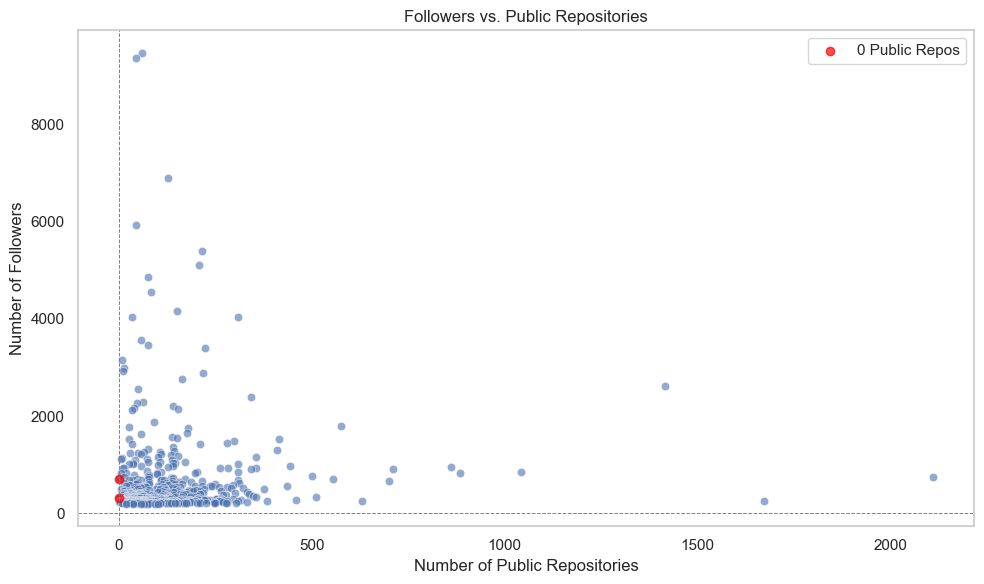

In [47]:
users_df = pd.read_csv('users.csv')
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=users_df, x='public_repos', y='followers', alpha=0.6)

# Highlight users with 0 public repositories
zero_repos = users_df[users_df['public_repos'] == 0]
plt.scatter(zero_repos['public_repos'], zero_repos['followers'], color='red', label='0 Public Repos', alpha=0.7)

# Customize the plot
plt.title('Followers vs. Public Repositories')
plt.xlabel('Number of Public Repositories')
plt.ylabel('Number of Followers')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.7)  # Adding a horizontal line at y=0
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.7)  # Adding a vertical line at x=0
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.savefig('followers_vs_public_repos.png')  # Save the figure
plt.show()